<a href="https://colab.research.google.com/github/jwookkim0512/3week-assignment/blob/main/6%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


data = pd.read_csv("/content/Social_Network_Ads.csv")


X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values      # Feature 추출 (Age, EstimatedSalary), 레이블 추출 (Purchased)


# 4. 학습 데이터 80%, 테스트 데이터 20% 분할 (random_state 설정하지 않음)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (320, 2)
X_test shape: (80, 2)
y_train shape: (320,)
y_test shape: (80,)


학습된 파라미터: w0 = -0.6345441322823376 , w1 = 1.1833948651780977 , w2 = 0.703212548228401


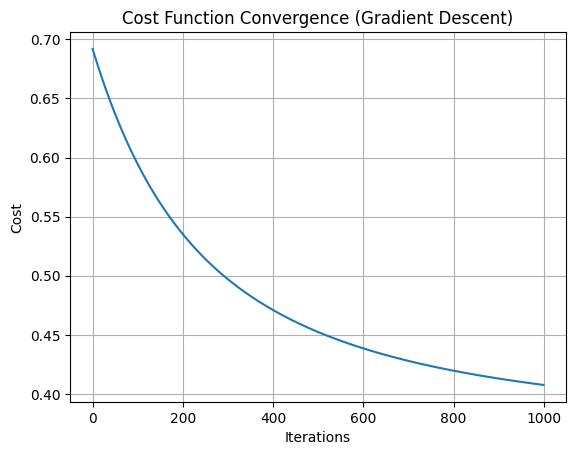

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. CSV 파일 로딩
data = pd.read_csv("/content/Social_Network_Ads.csv")

# 2. Feature (Age, EstimatedSalary)와 Target (Purchased) 추출
X = data[['Age', 'EstimatedSalary']].values  # 특성
y = data['Purchased'].values  # 타겟

# 3. 데이터 정규화 (특성 스케일링)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 학습 데이터 80%, 테스트 데이터 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Bias 항 추가 (X_train에 1을 추가하여 Bias 항을 포함)
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])  # 1을 추가하여 Bias 항을 고려
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])  # 테스트 데이터에도 1을 추가

# 6. 경사하강법 함수 (Gradient Descent)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_func(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, weights))  # 예측값 계산
        gradient = np.dot(X.T, (h - y)) / m  # 기울기 계산 (경사)
        weights -= learning_rate * gradient  # 가중치 업데이트
        cost_history.append(cost_func(X, y, weights))  # 비용 기록

    return weights, cost_history

# 7. 가중치 초기화 (bias 항을 포함한 특성만 고려)
initialw = np.zeros(X_train_bias.shape[1])  # 가중치 초기화 (Bias 항을 포함)

# 8. 경사하강법을 통한 학습
finalw, cost_history = gradient_descent(X_train_bias, y_train, initialw, learning_rate=0.01, iterations=1000)

# 9. 학습된 파라미터 출력
w0, w1, w2 = finalw  # 최종 가중치 (w0: bias, w1: Age, w2: EstimatedSalary)
print("학습된 파라미터: w0 =", w0, ", w1 =", w1, ", w2 =", w2)

# 10. 비용 함수 시각화 (경과된 비용 값)
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence (Gradient Descent)')
plt.grid(True)
plt.show()

학습된 파라미터: w0 = -1.0529134008675236, w1 = 2.0125384921084057, w2 = 1.1232209304946785


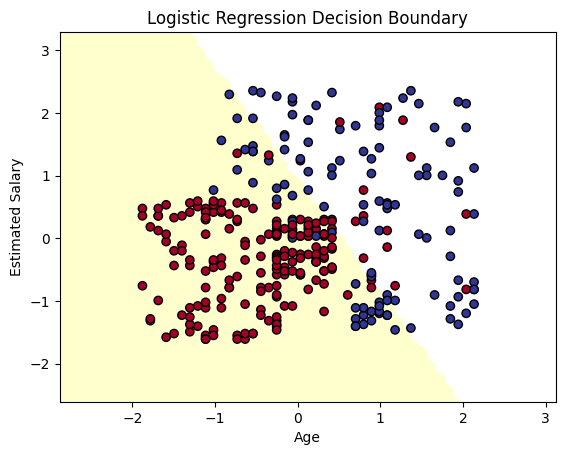

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. CSV 파일 로딩
data = pd.read_csv("/content/Social_Network_Ads.csv")

# 2. Feature (Age, EstimatedSalary)와 Target (Purchased) 추출
X = data[['Age', 'EstimatedSalary']].values  # 특성
y = data['Purchased'].values  # 타겟

# 3. 데이터 정규화 (특성 스케일링)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 학습 데이터 80%, 테스트 데이터 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. 학습된 파라미터 출력 (w0: bias, w1: Age, w2: EstimatedSalary)
w0 = model.intercept_[0]  # bias (절편)
w1, w2 = model.coef_[0]  # 특성 (Age, EstimatedSalary)에 대한 가중치
print(f"학습된 파라미터: w0 = {w0}, w1 = {w1}, w2 = {w2}")

# 7. 모델 시각화 (결정 경계)
# X_train의 범위로 meshgrid 생성 (2차원)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Z 값을 계산하여 결정 경계를 예측
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 8. 그래프에 결정 경계를 그리기
plt.contourf(xx, yy, Z, levels=[0, 0.5], cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Logistic Regression Decision Boundary')
plt.show()